In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('wandb_256.csv')

In [2]:
one = df[(df['architecture'] == '3DCNN_256_stride1_new') & (df['training_set'] == 1000)]

In [3]:
ten = df[(df['architecture'] == '3DCNN_256_stride1_new') & (df['training_set'] == 10000)]

In [4]:
fifty = df[(df['architecture'] == '3DCNN_256_stride1_new') & (df['training_set'] == 50000)]

In [5]:
one = one[['Name', 'validation_loss', 'activation_fn', 'kernel_size', 'epochs_choice', 'learning_rate']]

In [6]:
ten = ten[['Name', 'validation_loss', 'activation_fn', 'kernel_size', 'epochs_choice', 'learning_rate']]

In [7]:
fifty = fifty[['Name', 'validation_loss', 'activation_fn', 'kernel_size', 'epochs_choice', 'learning_rate']]

In [8]:
ten['kernel_size'].value_counts()

kernel_size
5    18
3    18
Name: count, dtype: int64

In [9]:
ten['activation_fn'].value_counts()

activation_fn
ReLU       18
Sigmoid    18
Name: count, dtype: int64

In [10]:
ten['epochs_choice'].value_counts()

epochs_choice
15    12
10    12
5     12
Name: count, dtype: int64

In [11]:
ten['learning_rate'].value_counts()

learning_rate
0.00010    12
0.00100    12
0.00001    12
Name: count, dtype: int64

In [12]:
one_agg = one.groupby(by = one.columns.drop('validation_loss').to_list()).agg(["mean", "median", "var", np.std]).reset_index()

In [13]:
ten_agg = ten.groupby(by = ten.columns.drop('validation_loss').to_list()).agg(["mean", "median", "var", np.std]).reset_index()

In [14]:
fifty_agg = fifty.groupby(by = fifty.columns.drop('validation_loss').to_list()).agg(["mean", "median", "var", np.std]).reset_index()

In [15]:
validation_loss_1 = pd.Series(dtype = float)
validation_loss_10 = pd.Series(dtype = float)
validation_loss_50 = pd.Series(dtype = float)

In [16]:
for kernel_size in [3, 5]:
    for epochs_choice in [5, 10, 15]:
        for learning_rate in [1e-3, 1e-4, 1e-5]:
            for activation_fn in ['ReLU', 'Sigmoid']:
                run_name = f'3DCNN_1000_{kernel_size}_{activation_fn}_{epochs_choice}_{learning_rate}_4'
                validation_loss_1.loc[run_name] = one_agg[one_agg['Name'] == run_name]['validation_loss']['mean'].values[0]
                run_name = f'3DCNN_10000_{kernel_size}_{activation_fn}_{epochs_choice}_{learning_rate}_4'
                validation_loss_10.loc[run_name] = ten_agg[ten_agg['Name'] == run_name]['validation_loss']['mean'].values[0]
                run_name = f'3DCNN_50000_{kernel_size}_{activation_fn}_{epochs_choice}_{learning_rate}_4'
                validation_loss_50.loc[run_name] = fifty_agg[fifty_agg['Name'] == run_name]['validation_loss']['mean'].values[0]

In [17]:
comparison = pd.concat({'1k': pd.Series(validation_loss_1.values), '10k': pd.Series(validation_loss_10.values), '50k': pd.Series(validation_loss_50.values)}, axis = 1)
comparison['Name'] = validation_loss_1.index
comparison.sort_values(by = '1k', inplace = True)

In [18]:
comparison

,1k,10k,50k,Name
30,0.174778,0.130036,0.119320,3DCNN_1000_5_ReLU_15_0.001_4
32,0.183042,0.127943,0.100636,3DCNN_1000_5_ReLU_15_0.0001_4
12,0.190516,0.159432,0.104019,3DCNN_1000_3_ReLU_15_0.001_4
26,0.192882,0.132347,0.102074,3DCNN_1000_5_ReLU_10_0.0001_4
0,0.194255,0.151957,0.132127,3DCNN_1000_3_ReLU_5_0.001_4
31,0.196402,0.155524,0.145654,3DCNN_1000_5_Sigmoid_15_0.001_4
6,0.198852,0.134307,0.108470,3DCNN_1000_3_ReLU_10_0.001_4
20,0.201340,0.139957,0.113690,3DCNN_1000_5_ReLU_5_0.0001_4
2,0.204858,0.165577,0.122033,3DCNN_1000_3_ReLU_5_0.0001_4
22,0.205025,0.154141,0.134251,3DCNN_1000_5_ReLU_5_1e-05_4


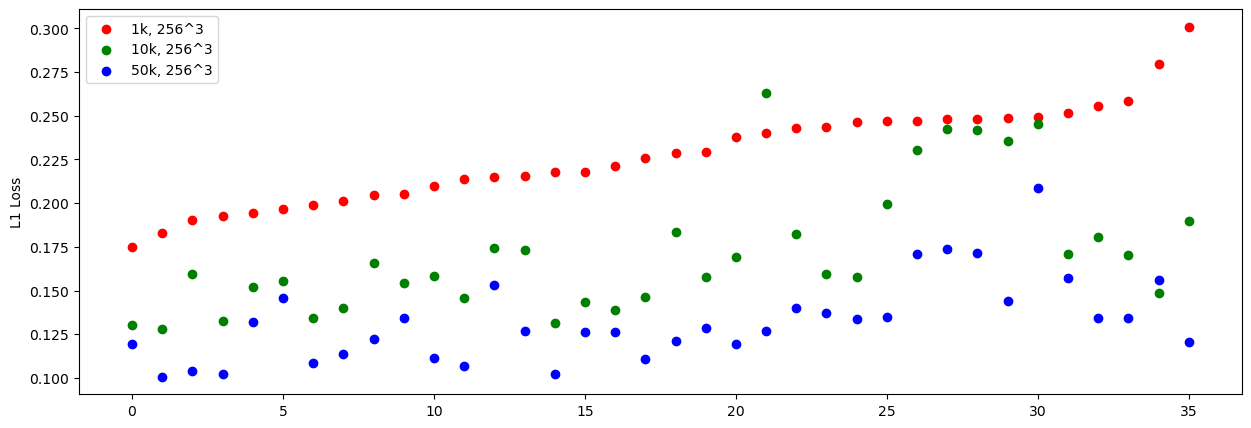

In [19]:
plt.figure(figsize = (15, 5))
plt.scatter(range(len(validation_loss_1)), comparison['1k'], color = 'r', label = '1k, 256^3')
plt.scatter(range(len(validation_loss_10)), comparison['10k'], color = 'g', label = '10k, 256^3')
plt.scatter(range(len(validation_loss_50)), comparison['50k'], color = 'b', label = '50k, 256^3')
plt.ylabel('L1 Loss')
plt.legend()
plt.show()

In [20]:
comparison[comparison['10k'] > comparison['1k']]

,1k,10k,50k,Name
27,0.240245,0.2633,0.126613,3DCNN_1000_5_Sigmoid_10_0.0001_4
